In this notebook we have implemented a simple bandit algorithm described on page 32 with optimistic initial values Chapter 2.6

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("paper")
sns.set_theme("paper")
%matplotlib inline

In [2]:
num_testbed = 2000
num_armed_bandits = 10
num_experience_steps = 1000

testbed = np.random.normal(size=(num_testbed, num_armed_bandits))

In [3]:
def simple_bandit_algorithm(optimal_value, learned_value, value_occur, 
                            epsilon=0.0, num_learning_iters=1000):
    p_optimal_action = []
    best_action = np.argmax(optimal_value)
    num_possible_actions = len(learned_value)
    # loop by the specified number of iterations
    for learning_iters in range(num_learning_iters):
        action_probs = (epsilon/num_possible_actions) * np.ones_like(learned_value)
        action_probs[np.argmax(learned_value)] += 1 - epsilon
        # select epsilon-greedy action based on pre-calculated probabilities
        action = np.random.choice(num_possible_actions, p=action_probs)
        p_optimal_action.append(int(action==best_action))
        random_rewards = np.random.normal(loc=optimal_value)
        value_occur[action] += 1
        learned_value[action] += (1/value_occur[action]) * (random_rewards[action] - learned_value[action])
    return p_optimal_action

def run_sba_with_OIV(optimal_values, learned_values, value_occurs, 
                     epsilon=0.0, num_learning_iters=1000):
    percent_optimal_action = []
    for optimal_value, learned_value, value_occur in zip(optimal_values, learned_values, value_occurs):
        percent_optimal_action.append(simple_bandit_algorithm(optimal_value, learned_value, value_occur, 
                                                              epsilon, num_learning_iters))
    return np.array(percent_optimal_action)

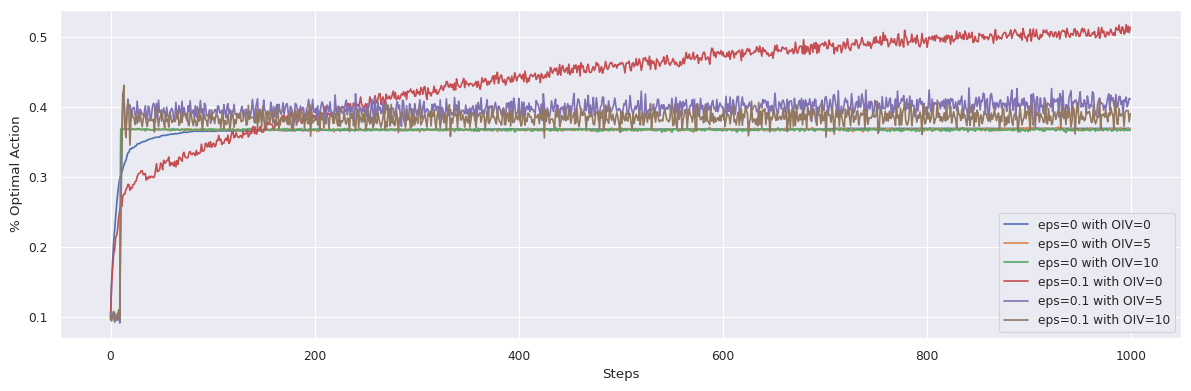

In [ ]:
value_select_counts = np.zeros_like(testbed)
fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))

for eps in [0, 1e-1]:
    for optimistic_init_value in [0, 5, 10]:
        learned_value_estimates = optimistic_init_value* np.ones_like(testbed)

        percent_optimal_action = run_sba_with_OIV(optimal_values=testbed, learned_values=learned_value_estimates, 
                                                value_occurs=value_select_counts, epsilon=eps, 
                                                num_learning_iters=num_experience_steps)
        # visualizing results over learning steps
        axis.plot(np.arange(0, num_experience_steps), np.mean(percent_optimal_action, axis=0, keepdims=True).reshape(-1), 
                  label=f"eps={np.round(eps, decimals=3)} with OIV={optimistic_init_value}")
        axis.set_xlabel("Steps")
        axis.set_ylabel("% Optimal Action")
        
fig.tight_layout()
plt.legend()
plt.show()